# linear regression

In [6]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
%matplotlib inline

In [7]:
link="http://bit.ly/w-data"

In [8]:
data=pd.read_csv(link)

In [9]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

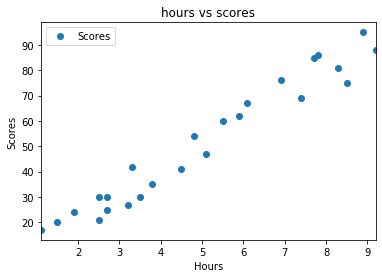

In [12]:
data.plot(x='Hours',y='Scores',style='o')
plt.title('hours vs scores')
plt.xlabel('Hours'),plt.ylabel('Scores')
plt.show()

# Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [13]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

### Training the algorithm

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
reg=LinearRegression()

In [17]:
reg.fit(x_train,y_train)

LinearRegression()

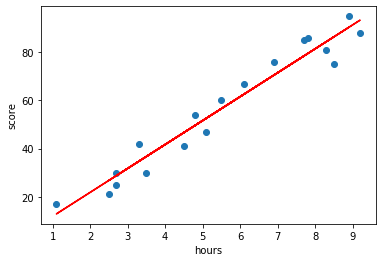

In [18]:
plt.scatter(x_train,y_train)
plt.plot(x_train,reg.predict(x_train),color='red')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [35]:
print(reg.intercept_)

1.932204253151646


In [48]:
print(reg.coef_)

[9.94167834]


In [20]:
y_pred=reg.predict(x_test)
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [21]:
d1=pd.DataFrame({'Actual':y_test,'predicted':y_pred})
d1

,Actual,predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [52]:
hours=[[9.25]]
pred=float(reg.predict(hours))
print('no.of hours={}'.format(hours))
print('predicted score={}'.format(pred))

no.of hours=[[9.25]]
predicted score=93.89272889341655


### evaluate the performance of algorithm. 

In [53]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.130879918502486


# Task3- Unsupervised Machine Learning

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [22]:
data = pd.read_csv('Iris.csv') #importing dataset

In [23]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [24]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [27]:
data.shape

(150, 6)

## Elbow Method

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion.

In [28]:
x=data.iloc[:,1:5].values
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [29]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i , init='k-means++', random_state = 0)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)
    
print(wcss)

[680.8243999999996, 152.36870647733915, 78.94084142614601, 57.34540931571815, 46.535582051282034, 38.93873974358975, 34.190687924796634, 29.90537429982511, 27.927882157034986, 25.955497086247092]


### Plotting the Elbow function

Text(0, 0.5, 'WCSS')

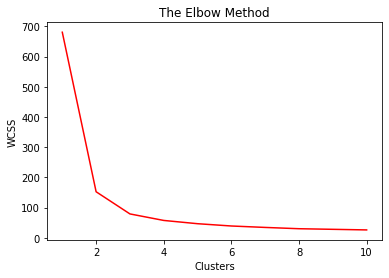

In [33]:
x_range = range(1,11)

plt.plot(x_range , wcss,color='red')
plt.title('The Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

 From the plot we can see that wcss form 3 is almost linear

## K- Means Clustering

In [34]:
kmeans = KMeans(n_clusters=3 , init='k-means++' , random_state = 0)
kmeans.fit(x)


KMeans(n_clusters=3, random_state=0)

## Predicting Values

In [35]:
pred_kmeans = kmeans.predict(x)
print(pred_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


## Visualization of clusters

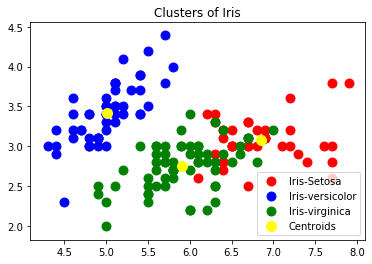

In [37]:
plt.scatter(x[pred_kmeans == 0 , 0] , x[pred_kmeans == 0 ,1] , color = 'red' ,s=80, label = 'Iris-Setosa')
plt.scatter(x[pred_kmeans == 1 , 0] , x[pred_kmeans == 1 , 1] , color = 'blue' ,s=80 , label ='Iris-versicolor')
plt.scatter(x[pred_kmeans == 2 , 0] , x[pred_kmeans == 2 , 1] , color = 'green' ,s=80 , label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , color = 'yellow' ,s=100 , label = 'Centroids')
plt.title('Clusters of Iris')
plt.legend()
plt.show()